# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## Use the file Data_Marketing_Customer_Analysis_Round3.csv

In [2]:
df=pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
df.columns
df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


## Check if there are highly correlated features and drop them if there are any.

### Making a numerical df 

In [4]:
numerical=df.select_dtypes(include=np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


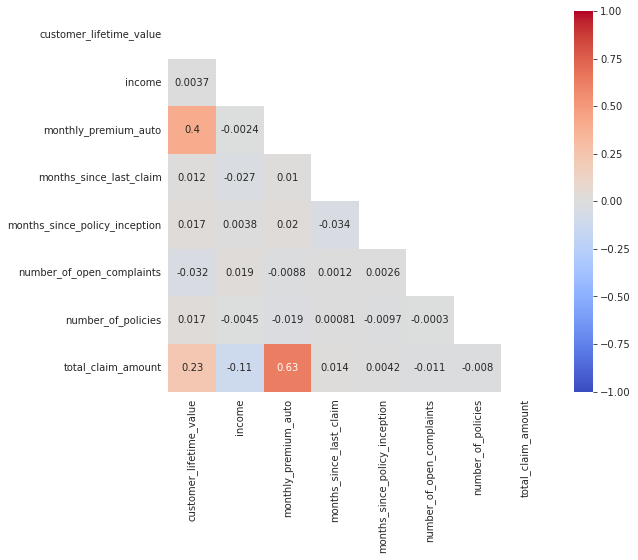

In [5]:
corr =df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

## One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

### Making a categorical df

In [6]:
categorical=df.select_dtypes(include=object)
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [7]:
categoricals_features= df.select_dtypes("object")
categoricals_features

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [9]:
categoricals_features.drop(["effective_to_date"],axis=1,inplace=True)
categoricals_features

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [10]:
hot_categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)
hot_categoricals_features

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [12]:
df=pd.concat([hot_categoricals_features,numerical], axis=1)
df

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,0,0,0,0,0,1,0,0,0,...,1,0,4809,48029,61,7,52,0,9,292
1,0,0,1,0,0,0,1,0,0,0,...,1,0,2228,92260,64,3,26,0,1,744
2,1,0,0,0,0,0,0,0,0,0,...,1,0,14947,22139,100,34,31,0,2,480
3,0,1,0,1,1,0,1,0,0,0,...,1,0,22332,49078,97,10,3,0,2,484
4,0,1,0,0,0,1,0,0,0,0,...,1,0,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,1,0,15563,61541,253,12,40,0,7,1214
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,5259,61146,65,7,68,0,6,273
10686,0,0,0,0,1,0,0,0,0,0,...,1,0,23893,39837,201,11,63,0,2,381
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,11971,64195,158,0,27,4,6,618


## X-y split (y is the target variable, which is the total claim amount)

In [52]:
X=df.drop('total_claim_amount', axis=1)
y=df.total_claim_amount

In [53]:
# Train-test split.
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [ ]:
# Standardize the data (after the data split).
std_scaler=StandardScaler().fit(X_train)
X_train_scaled=std_scaler.transform(X_train)
X_train.shape# Standardize the data (after the data split).
std_scaler=StandardScaler().fit(X_train)
X_train_scaled=std_scaler.transform(X_train)
X_train.shape

In [ ]:
X_test_scaled=std_scaler.transform(X_test)

In [ ]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

# Apply linear regression.

## Modeling using Statsmodels

In [ ]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

In [ ]:
model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled)

In [ ]:
X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant

In [ ]:
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

In [ ]:
predictions_test

### Display adjusted R-squared

In [ ]:
print(model.rsquared_adj)

## Modeling using Scikit Learn

### Model fitting

In [ ]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

### Model parameters ( b1,b2,b3,b4)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
#y= -6.6* customer_lifetime_value  -33.18 * income   +187.80 * monthly_premium_auto  +1.90 * months_since_last_claim  -0.91 * months_since_policy_inception + 1.71 * number_of_open_complaints -2.32 number_of_policies
 

## Making prediction

In [ ]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [ ]:
y_pred

In [ ]:
y_test

## Creating a new data

In [ ]:
new_data=[150,42,9,6.4,44.5,7,888]
new_data_scaled=std_scaler.transform(np.array(new_data).reshape(-1,7))

## Predicting on new data

In [ ]:
np.array(np.array(new_data).reshape(-1,7)).shape

In [ ]:
model.predict(new_data_scaled)

## Evaluating Model Performance

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

# Model Interpretation.


In [ ]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [ ]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

# Model Validation:


## Model Evaluation

## Error metrics

In [ ]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

## Prediction on the train set

In [ ]:
mse(y_train,y_pred_train)

In [ ]:
R2=r2_score(y_test,y_pred)
R2

In [ ]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [ ]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

In [ ]:
X_test.shape[1]

In [ ]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

## Feature Importance

In [ ]:
features_importances

In [ ]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#f5ce42')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
hot_categoricals_features.to_csv("Data/Data_Marketing_Customer_Analysis_Round3.csv")
hot_categoricals_features

## Please rerun the model after adding the hot encoded categorical variables as well as other numeric categorical variables (e.g. number of open complaintes).

In [ ]:
rerunmodel_adding=pd.concat((numerical,hot_categoricals_features),axis=1)

In [ ]:
rerunmodel_adding

In [ ]:
hot_rerunmodel_adding=pd.get_dummies(rerunmodel_adding, drop_first=True)
hot_rerunmodel_adding

In [ ]:
# X-y split (y is the target variable, which is the total claim amount)
X=df.drop('total_claim_amount', axis=1)
y=numerical.total_claim_amount

In [ ]:
# Train-test split.
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)


In [ ]:
# Standardize the data (after the data split).
std_scaler=StandardScaler().fit(X_train)
X_train_scaled=std_scaler.transform(X_train)
X_train.shape# Standardize the data (after the data split).
std_scaler=StandardScaler().fit(X_train)
X_train_scaled=std_scaler.transform(X_train)
X_train.shape

In [ ]:
X_test_scaled=std_scaler.transform(X_test)

In [ ]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

In [ ]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

In [ ]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [ ]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [ ]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

In [ ]:
##prediction on the train set
mse(y_train,y_pred_train)

In [ ]:
R2=r2_score(y_test,y_pred)
R2

## Please rerun the model after removing the outliers and compare the results using R2 metric.

In [ ]:
import plotly.express as px

In [ ]:
hot_rerunmodel_adding.head()

# Lab | Comparing regression models (W7/D1)

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Fit the models Linear Regressor, Lasso, Ridge and (optional KNeighborsRegressor ) and compare the model performances.

### Linear Regression

In [39]:
model=LinearRegression()
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

LinearRegression: Train -> 0.7624845541249481, Test -> 0.7825929050077821


### Lasso model   could drop features and make it a feature selection technique

In [40]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0.05)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.7624645872294713, Test -> 0.782666647108019


### Ridge

In [41]:
model=Ridge(alpha=100)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.7574507123963997, Test -> 0.7790044404758272


### ElasticNet

In [42]:
model=ElasticNet(alpha=0.1)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

ElasticNet: Train -> 0.736099462023988, Test -> 0.7591974973455208


### (Optional) Define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [46]:
def list_of_models():
   model=LinearRegression()
   model.fit(X_train, y_train)
   print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}") 
   model=Lasso(alpha=0.05)
   model.fit(X_train, y_train)
   print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")
   model=Ridge(alpha=100)
   model.fit(X_train, y_train)
   print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")
   model=ElasticNet(alpha=0.1)
   model.fit(X_train, y_train)
   print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")
   return

In [47]:
list_of_models()

LinearRegression: Train -> 0.7624845541249481, Test -> 0.7825929050077821
Lasso: Train -> 0.7624645872294713, Test -> 0.782666647108019
Ridge: Train -> 0.7574507123963997, Test -> 0.7790044404758272
ElasticNet: Train -> 0.736099462023988, Test -> 0.7591974973455208


### Use feature selection techniques (P-Value, RFE) to select subset of features to train the model with(if necessary). Refit the models with the selected features.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  ## recursive feature elemination technique

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 30, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Final selected features: 


,region_north west,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,employment_status_employed,employment_status_medical leave,...,policy_special l1,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,monthly_premium_auto
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,77
1,1,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,68
2,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,70
3,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,78
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6408,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,94
6409,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,98
6410,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,64
6411,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,106


In [49]:
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.datasets import load_boston

## Fitting OLS model

In [54]:
# from splitting
X

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,month_jan,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_married,marital_status_single,policy_type_personal auto,policy_type_special auto,policy_corporate l2,policy_corporate l3,policy_personal l1,policy_personal l2,policy_personal l3,policy_special l1,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,4809,48029,61,7,52,0,9
1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,2228,92260,64,3,26,0,1
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,14947,22139,100,34,31,0,2
3,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,22332,49078,97,10,3,0,2
4,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,15563,61541,253,12,40,0,7
10685,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,5259,61146,65,7,68,0,6
10686,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,23893,39837,201,11,63,0,2
10687,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,11971,64195,158,0,27,4,6


In [55]:
X_added_constant = sm.add_constant(X)
X_added_constant

,const,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,month_jan,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_married,marital_status_single,policy_type_personal auto,policy_type_special auto,policy_corporate l2,policy_corporate l3,policy_personal l1,policy_personal l2,policy_personal l3,policy_special l1,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,1.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,4809,48029,61,7,52,0,9
1,1.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,2228,92260,64,3,26,0,1
2,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,14947,22139,100,34,31,0,2
3,1.0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,22332,49078,97,10,3,0,2
4,1.0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,9025,23675,117,33,31,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,15563,61541,253,12,40,0,7
10685,1.0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,5259,61146,65,7,68,0,6
10686,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,23893,39837,201,11,63,0,2
10687,1.0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,11971,64195,158,0,27,4,6


In [56]:
# add this constant value of 1 for the intercepts
model = sm.OLS(y,X_added_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     747.2
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:27:50   Log-Likelihood:                -67982.
No. Observations:               10689   AIC:                         1.361e+05
Df Residuals:                   10640   BIC:                         1.364e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            -354.1630     14.631    -24.206      0.000    -382.843    -325.484
region_east                         5.9770      5.266      1.135      0.256      -4.345      16.299
region_north west                  -1.6529      3.602     -0.459      0.646      -8.713       5.407
region_west region                  4.0544      3.437      1.179      0.238      -2.684      10.792
response_yes                      -24.2922      4.395     -5.528      0.000     -32.906     -15.678
coverage_extended                 -12.7534      3.861     -3.303      0.001     -20.322      -5.184
coverage_premium                  -11.3244      7.427     -1.525      0.127     -25.883       3.234
education_college                  -6.8353      3.534     -1.934      0.053     -13.762       0.092
education_doctor                  -13.4209      7.582     -1.770      0.077     -28.283       1.441
education_high school or below     11.5788      3.581      3.233      0.001       4.559      18.599
education_master                   -9.6457      5.407     -1.784      0.074     -20.244       0.953
month_jan                          -0.7349      2.727     -0.270      0.788      -6.080       4.610
employment_status_employed        -10.0961      7.056     -1.431      0.152     -23.927       3.734
employment_status_medical leave    13.6858      9.004      1.520      0.129      -3.964      31.335
employment_status_retired          -7.7699     10.566     -0.735      0.462     -28.481      12.941
employment_status_unemployed       79.4289      7.461     10.647      0.000      64.805      94.053
gender_m                           15.6197      2.744      5.692      0.000      10.241      20.998
location_code_suburban            379.6484      3.941     96.335      0.000     371.923     387.373
location_code_urban               222.2735      4.483     49.586      0.000     213.487     231.060
marital_status_married             -5.3462      4.044     -1.322      0.186     -13.273       2.581
marital_status_single              66.1655      4.643     14.251      0.000      57.064      75.267
policy_type_personal auto           0.8245      5.248      0.157      0.875      -9.462      11.111
policy_type_special auto           14.1109      7.450      1.894      0.058      -0.493      28.715
policy_corporate l2                -5.9656      8.656     -0.689      0.491     -22.933      11.002
policy_corporate l3                -0.8087      7.907     -0.102      0.919     -16.307      14.690
policy_personal l1                  4.3990      3.367      1.307      0.191      -2.201      10.999
policy_personal l2                 -1.7164      2.918     -0.588      0.556      -7.437       4.004
policy_personal l3                 -1.8581      2.647     -0.702      0.483      -7

## Dropping Insignificant Features

In [57]:
model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[0:].index.tolist()
significant_features=X_added_constant[model.params[list(np.where(model.pvalues < 0.05)[0])].iloc[0:].index.tolist()]
significant_features

,const,response_yes,coverage_extended,education_high school or below,employment_status_unemployed,gender_m,location_code_suburban,location_code_urban,marital_status_single,policy_special l1,renew_offer_type_offer2,renew_offer_type_offer3,vehicle_class_sports car,vehicle_class_suv,income,monthly_premium_auto,months_since_last_claim
0,1.0,0,0,0,0,1,1,0,0,0,0,1,0,0,48029,61,7
1,1.0,0,0,0,1,0,1,0,1,0,0,0,0,0,92260,64,3
2,1.0,0,0,0,0,1,1,0,1,0,0,1,0,1,22139,100,34
3,1.0,1,1,0,0,1,1,0,1,0,1,0,0,0,49078,97,10
4,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,23675,117,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1.0,0,0,0,1,0,1,0,0,0,0,1,0,0,61541,253,12
10685,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0,61146,65,7
10686,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,39837,201,11
10687,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,64195,158,0


In [59]:
model = sm.OLS(y,significant_features).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     2234.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:47:15   Log-Likelihood:                -68009.
No. Observations:               10689   AIC:                         1.361e+05
Df Residuals:                   10672   BIC:                         1.362e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -368.2605      6.465    -56.958      0.000    -380.934    -355.587
response_yes                     -25.5339      4.198     -6.082      0.000     -33.763     -17.305
coverage_extended                -11.2566      3.037     -3.706      0.000     -17.210      -5.303
education_high school or below    16.0613      3.036      5.290      0.000      10.109      22.013
employment_status_unemployed      86.9384      3.650     23.819      0.000      79.784      94.093
gender_m                          15.6663      2.731      5.736      0.000      10.313      21.020
location_code_suburban           382.7342      3.836     99.787      0.000     375.216     390.253
location_code_urban              222.5259      4.480     49.673      0.000     213.745     231.307
marital_status_single             70.1466      3.364     20.854      0.000      63.553      76.740
policy_special l1                 53.2790     15.967      3.337      0.001      21.980      84.578
renew_offer_type_offer2           13.1635      3.131      4.205      0.000       7.027      19.300
renew_offer_type_offer3            6.4601      3.903      1.655      0.098      -1.192      14.112
vehicle_class_sports car         -22.9131      6.320     -3.626      0.000     -35.301     -10.525
vehicle_class_suv                -15.4086      3.768     -4.089      0.000     -22.795      -8.023
income                            -0.0003   5.75e-05     -4.504      0.000      -0.000      -0.000
monthly_premium_auto               5.1718      0.045    114.888      0.000       5.084       5.260
months_since_last_claim            0.3526      0.135      2.614      0.009       0.088       0.617
==============================================================================
Omnibus:                     4765.217   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60187.436
Skew:                           1.800   Prob(JB):                         0.00
Kurtosis:                      14.053   Cond. No.                     6.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Refit the models with the selected features.

In [60]:
def list_of_models():
   model=LinearRegression()
   model.fit(X_train, y_train)
   print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}") 
   model=Lasso(alpha=0.05)
   model.fit(X_train, y_train)
   print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")
   model=Ridge(alpha=100)
   model.fit(X_train, y_train)
   print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")
   model=ElasticNet(alpha=0.1)
   model.fit(X_train, y_train)
   print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")
   return

In [61]:
list_of_models()

LinearRegression: Train -> 0.7707679994873204, Test -> 0.7703549165905046
Lasso: Train -> 0.7707447675741849, Test -> 0.7705326449321109
Ridge: Train -> 0.7667593900312797, Test -> 0.7670814097523897
ElasticNet: Train -> 0.7443056590336798, Test -> 0.7448598604804266
